In [456]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [457]:
cd '/content/gdrive/MyDrive/ML/'

/content/gdrive/MyDrive/ML


In [458]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

import pickle
import json

In [459]:
df = pd.read_csv("bengaluru_house_prices.csv")
print(df.shape)
df.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [461]:
for col in df.columns:
    print(f'\n\n"{col}" Unique Values count : {df[col].nunique()} \n', df[col].unique())



"area_type" Unique Values count : 4 
 ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


"availability" Unique Values count : 81 
 ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']


"location" Unique Values count : 1305 
 ['Electronic City Phase II' 'Chikka Tirupa

In [462]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [463]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [464]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

## Data Cleaning

### Handling NA Values

In [465]:
# Assuming that these features are not very important
df = df.drop(['area_type','society','availability','balcony'], axis = 1)
df.shape

(13320, 5)

In [466]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [467]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [469]:
# df[~pd.notnull(df["bath"])]
df = df.dropna()
df.shape

(13246, 5)

### Feature Engineering

In [470]:
# Bedrooms

df['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [471]:
df['bhk'] = df['size'].apply(lambda x:int(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [473]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [474]:
df[~df['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [475]:
# Lets get the avg of the "total_sqft" colmn where a range of value is present

def get_avg_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [476]:
df.shape

(13246, 6)

In [477]:
df['total_sqft'] = df['total_sqft'].apply(get_avg_sqft)

In [478]:
df.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [479]:
df.dropna(inplace = True)
df.shape

(13200, 6)

In [480]:
# Price Per Square Feet

df['price_per_sqft'] = df['price']* 100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [481]:
# from pandas.core import describe
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [482]:
location_stats = df['location'].value_counts()

location_stats

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [483]:
location_stats[location_stats < 10]

2nd Phase JP Nagar           9
Chandra Layout               9
Yemlur                       9
Kaverappa Layout             9
Banagiri Nagar               9
                            ..
Indiranagar HAL 2nd Stage    1
Maruthi HBCS Layout          1
K R C kothanur               1
1Channasandra                1
Abshot Layout                1
Name: location, Length: 1045, dtype: int64

In [484]:
# df.to_csv('bhp.csv', index=False)
location_stats_less_than_10 = location_stats[location_stats < 10]
location_stats_less_than_10

2nd Phase JP Nagar           9
Chandra Layout               9
Yemlur                       9
Kaverappa Layout             9
Banagiri Nagar               9
                            ..
Indiranagar HAL 2nd Stage    1
Maruthi HBCS Layout          1
K R C kothanur               1
1Channasandra                1
Abshot Layout                1
Name: location, Length: 1045, dtype: int64

In [485]:
len(location_stats_less_than_10)

1045

In [486]:
# location_with_more_than_10_properties

loc_with_more_than_10_props = location_stats[location_stats >= 10]
len(loc_with_more_than_10_props)

253

In [487]:
df['location'] = df['location'].apply(lambda x:'other' if x in location_stats_less_than_10 else x)
df['location'].nunique()

254

In [488]:
df['location'].isna().sum()

0

**Outlier Removal Using Business Logic**

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [489]:
df = df[~(df['total_sqft']/df['bhk'] < 300)]
df.shape

(12456, 7)

In [490]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,111.187960,2.649004,6308.502826
std,1260.404795,1.080275,152.203367,0.976046,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


### Outlier Removal Using Standard Deviation and Mean

Min sqft = 267

Max sqft price = 176470

his shows a wide variation in property prices. We should remove outliers per location using mean and 2 standard deviation

In [491]:
df['price_per_sqft'].std()

4168.127338507347

In [492]:
for key, subdf in df.groupby('location'):
    print(key)
    # print('\n\n\n\n')
    print(subdf)
    break

 Devarachikkanahalli
                   location       size  total_sqft  bath  price  bhk  \
152     Devarachikkanahalli      3 BHK      1250.0   2.0   44.0    3   
341     Devarachikkanahalli      2 BHK      1250.0   2.0   40.0    2   
2474    Devarachikkanahalli  2 Bedroom      1200.0   2.0   83.0    2   
5030    Devarachikkanahalli      2 BHK      1170.0   2.0   40.0    2   
5536    Devarachikkanahalli  3 Bedroom      1200.0   3.0  160.0    3   
5771    Devarachikkanahalli      3 BHK      1425.0   2.0   65.0    3   
6591    Devarachikkanahalli      2 BHK       947.0   2.0   43.0    2   
7536    Devarachikkanahalli      2 BHK      1130.0   2.0   36.0    2   
7767    Devarachikkanahalli      3 BHK      1417.0   2.0   76.0    3   
8268    Devarachikkanahalli      2 BHK      1230.0   2.0   58.0    2   
8954    Devarachikkanahalli      3 BHK      1705.0   3.0   75.0    3   
9894    Devarachikkanahalli      2 BHK      1116.0   2.0   47.0    2   
10582   Devarachikkanahalli      2 BHK     

In [493]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for location, data in df.groupby('location'):
        mean = data['price_per_sqft'].mean()
        std = data['price_per_sqft'].std()
        low = mean - 2*std
        high = mean + 2*std
        req_data = data[(data['price_per_sqft'] >= low) & (data['price_per_sqft'] <= high)]
        df_out = pd.concat([df_out,req_data], ignore_index = True)
    return df_out


In [494]:
# After the removal of outliers w.r.t total_sqft

df = remove_outliers(df)
df.shape

(11951, 7)

In [495]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509


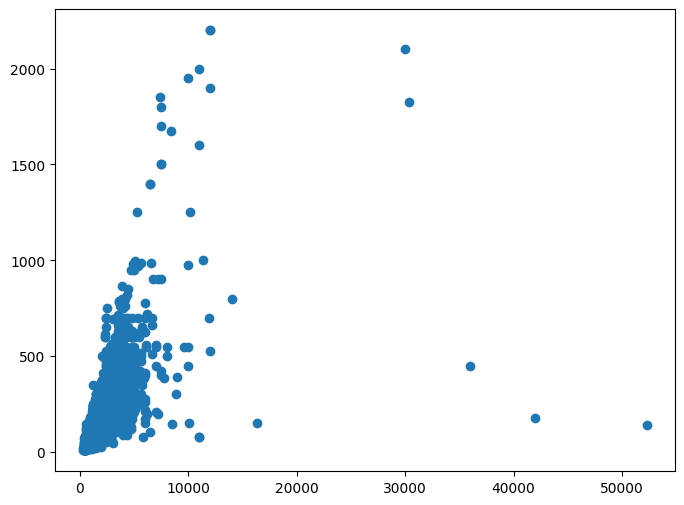

In [496]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
plt.scatter(df['total_sqft'], df['price'])

<Axes: xlabel='total_sqft', ylabel='price'>

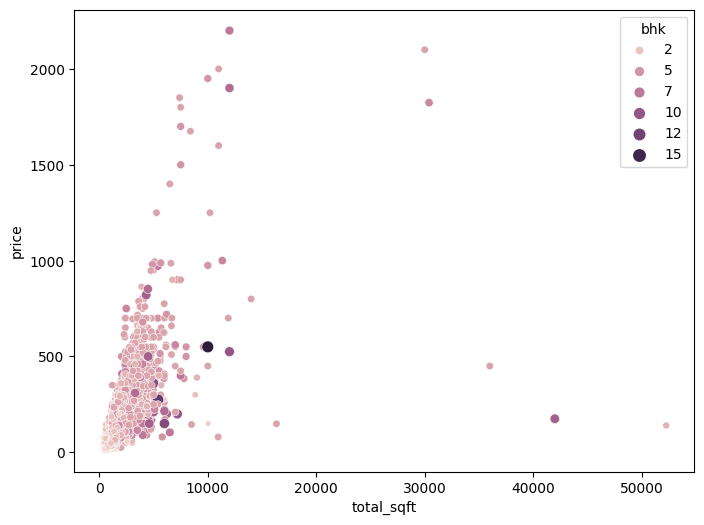

In [497]:
import seaborn as sns
sns.scatterplot(data=df, x="total_sqft", y="price", hue = 'bhk', size = 'bhk')

In [498]:
import plotly.express as px

location_to_plot = "Rajaji Nagar"
data_to_plot = df[df['location']==location_to_plot]

fig = px.scatter(data_to_plot, x="total_sqft", y="price", color="bhk", size='bhk', hover_data=['bhk'])
fig.show()



In [499]:
location_to_plot = "Hebbal"
data_to_plot = df[df['location']==location_to_plot]

fig = px.scatter(data_to_plot, x="total_sqft", y="price", color="bhk", size='bhk', hover_data=['bhk'])
fig.show()

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.


{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },

    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [500]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for loc, loc_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_data in loc_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : bhk_data['price_per_sqft'].mean(),
                'std' : bhk_data['price_per_sqft'].std(),
                'count' : bhk_data['price_per_sqft'].shape[0]
            }
        for bhk, bhk_data in loc_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_data[bhk_data.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df = remove_bhk_outliers(df)
df.shape

(8537, 7)

In [501]:
import plotly.express as px

location_to_plot = "Rajaji Nagar"
data_to_plot = df[df['location']==location_to_plot]

fig = px.scatter(data_to_plot, x="total_sqft", y="price", color="bhk", size='bhk', hover_data=['bhk'])
fig.show()


In [502]:
location_to_plot = "Hebbal"
data_to_plot = df[df['location']==location_to_plot]

fig = px.scatter(data_to_plot, x="total_sqft", y="price", color="bhk", size='bhk', hover_data=['bhk'])
fig.show()

(array([1.556e+03, 4.634e+03, 1.419e+03, 4.800e+02, 2.230e+02, 1.440e+02,
        6.200e+01, 9.000e+00, 6.000e+00, 4.000e+00]),
 array([ 1300.        ,  4194.19354839,  7088.38709677,  9982.58064516,
        12876.77419355, 15770.96774194, 18665.16129032, 21559.35483871,
        24453.5483871 , 27347.74193548, 30241.93548387]),
 <BarContainer object of 10 artists>)

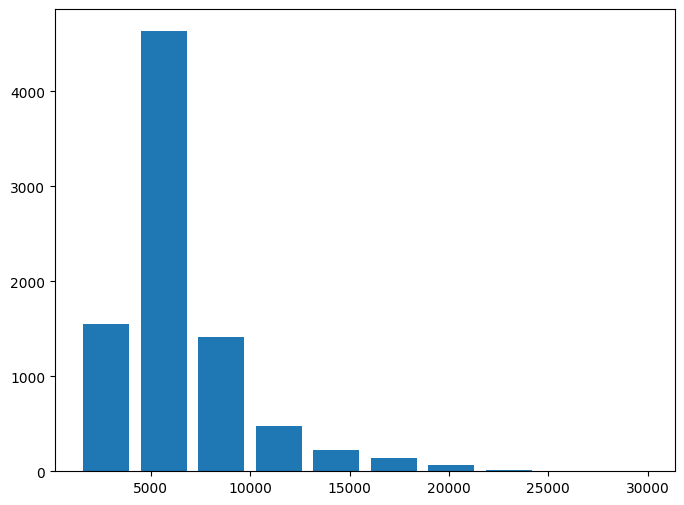

In [503]:
plt.hist(df['price_per_sqft'], rwidth = 0.8)

(array([5.345e+03, 2.094e+03, 9.210e+02, 1.090e+02, 5.000e+01, 1.000e+01,
        2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

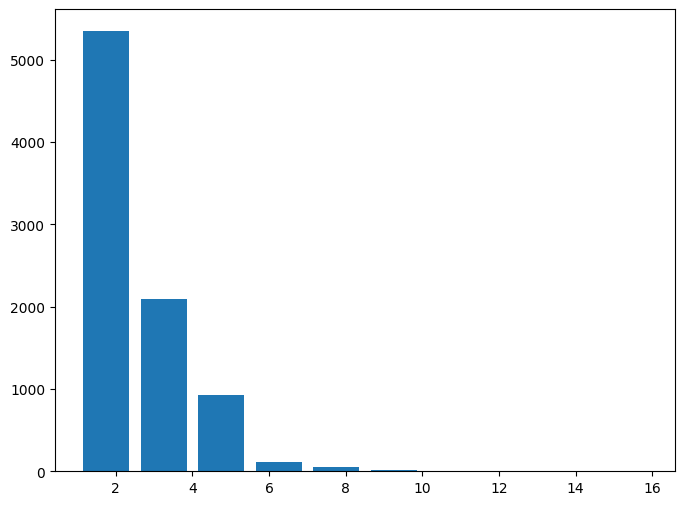

In [504]:
plt.hist(df['bath'], rwidth = 0.8)

In [505]:
df[df['bath']> 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
707,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
6389,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
10140,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
10229,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
10992,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
11331,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [506]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home
df = df[df['bath'] < df['bhk']+2]
df.shape

(8428, 7)

### One Hot Encoding the location

In [507]:
dummies_location = pd.get_dummies(df.location)
dummies_location.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [508]:
df = pd.concat([df,dummies_location.drop('other', axis = 1)], axis = 1)

In [509]:
# drop unecessary columns

df = df.drop(['location', 'size', 'price_per_sqft'], axis = 1)

## Model Building

In [510]:
print(df.shape)
df.head(3)

(8428, 257)


,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [511]:
X = df.drop('price', axis = 1)
y = df['price']

In [512]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [513]:
linear_clf = LinearRegression()

# fit the model
linear_clf.fit(X_train, y_train)

linear_clf.score(X_test, y_test)

0.7847504755219269

In [522]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
}
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valid

,model,best_score,best_params
0,lasso,0.659901,"{'alpha': 1, 'selection': 'random'}"
1,decision_tree,0.613025,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


### Test Model

In [525]:
X

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11942,2000.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11943,1140.0,1.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11946,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11947,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [523]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return linear_clf.predict([x])[0]

In [524]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



78.0951489885734

In [526]:
predict_price('Indira Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



205.91171049977663

In [527]:
predict_price('Indira Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



206.63347316860927

### Export the tested file to pickle

In [528]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(linear_clf,f)

In [529]:
# Export location and column information to a file that will be useful later
# on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))